# 1. Dataset Finding and Encoding
In order to implement a goof knowledge graph, the dataset we use needs to fulfill certain requirements. These are:


*   Textual representation. The dataset should contain long well written texts covering very diverse subject topics.
*   The dataset should be extensive and well maintained. Garbage in, garbage out.

*   Freely available for tinkering with to avoid breeching any data privacy rules or regulations since this is a 'demo' implementation.


I focused the search on Kaggle and on a movie plots datasets which fulfilled all the requirements and selected the top dataset on Kaggle for this specific search.

The Kaggle dataset has the following characteristics:


*   It has a large corpus. There are greater than 34,000 items.
*   Extracted from Wikipedia. It was built specifically to create content based movie recommenders, movie plot generators and information retrieval tools (such as knowledge graphs)
*   The dataset is large with almost 35,000 items.

The dataset contains the following information: the release year of the movie, the country of origin of the movie, the director's name, the cast list, the movie genre, the wikipedia URL from where the information was extracted and the movie plot in text format.








# 2. Exploratory Data Anlaysis
After selecting an appropriate dataset, I analyze the content of the data through Exploratory Data Analysis. I load the data to do some basic statistics and data visualizations. The goal of this process is to look at the raw data and find what pieces of information are of value and can be put to good use for creating a knowledge graph.

In [6]:
#importing necessary dependencies

import pandas as pd
 
%matplotlib inline


##2.1 Load the data

In [7]:
#Mounting my personal google drive where the dataset is stored so that I can use it directly in Colab
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
#Load the dataset obtained from Kaggle
movie_plots_data = pd.read_csv('/content/gdrive/MyDrive/Shopify Application/wiki_movie_plots_deduped.csv')

In [9]:
movie_plots_data.shape

(34886, 8)

We see that the data has ver 34,000 rows and 8 different columns. This an extensive dataset of publicly available data on movie plots. Lets dive  in and inspect the data further to gather some insights.

##2.2 Inspect the raw data

In [10]:
movie_plots_data.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


Displaying the head shows us the first five rows of the dataset. We can also see that the 8 columns are the Title f the movie, the country of Origin of the movie/Ethnicity, the Director, Cast, Genre, URL for the wikipedia page from which the data was scrapped, and finally the last and most important column that contains the textual data of the movie plots.

Let's go through each of the first seven columns and perform EDA and see what interesting observations we can pull.

##2.3 Visualize Country of Origin

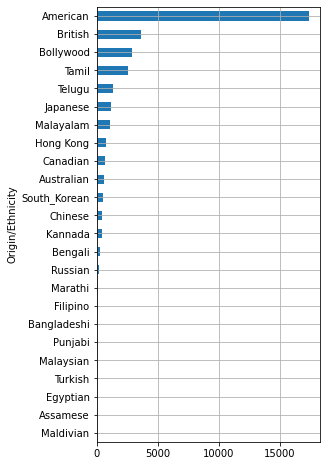

In [11]:
#Grouping the dataframe by Origin/Ethnicity and visualizing the top 25 items in a bar graph
movie_plots_data.groupby(['Origin/Ethnicity']).size().sort_values(ascending=True).plot.barh(figsize=(4,8), grid=True)

Most of the movies have an American origin, followed by British and then Indian/Bollywood based movies. The data therefore has a strong bias towards English language films and this will have an influence on the structure of the movie plots.

##2.4 Visualize Release Year Trend

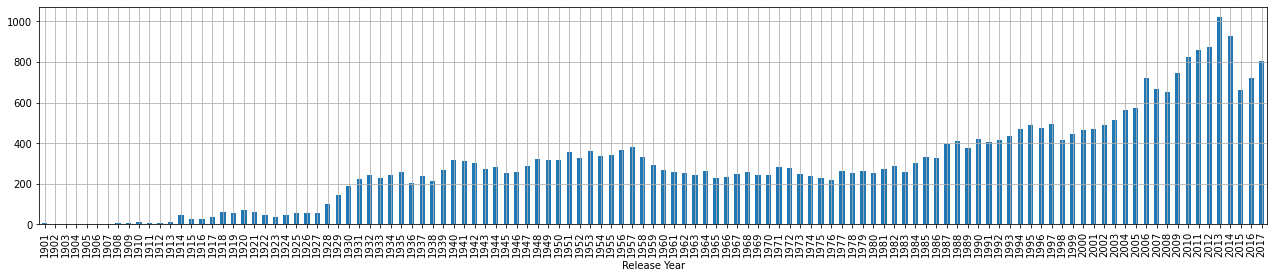

In [12]:
#Grouping by Release Year and visualizing this data
movie_plots_data.groupby(['Release Year']).size().plot(kind='bar', figsize=(22,4), grid=True)

We notice an increasing trend for movie releases from the first records of data until 1957, with a peak of about 400 movies released that year.
Then another increasing trend from 1965 - 1971, with a peak of about 300 movies, again from 1976 - 1997 with a peak of 400+ movies, from 1998 - 2006 with a peak fo 800 movies and then lastly, from 2008 - 2013, with a peak of about 100 movies.
Throughout the rest of the time there is a decreasing trend in movie releases each year.

##2.5 Visualize Genre Breakdown

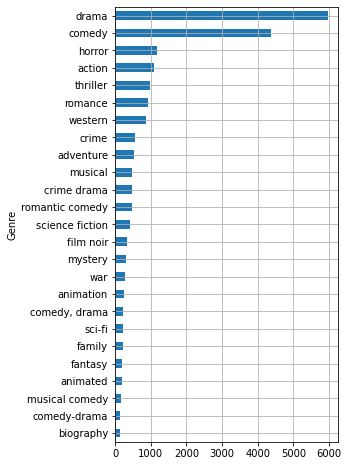

In [13]:
movie_plots_data[movie_plots_data['Genre']!='unknown'].groupby(['Genre']).size().sort_values(ascending=True).tail(25).plot.barh(figsize=(4,8), grid=True)

Drama and Comedy are the most popular genres, followed by horror and action, which have much smaller values. The chart visualizes an interesting observation suggesting that an exponential distriution for the number of movies for each distribution.

##2.6 Visualize Top Directors

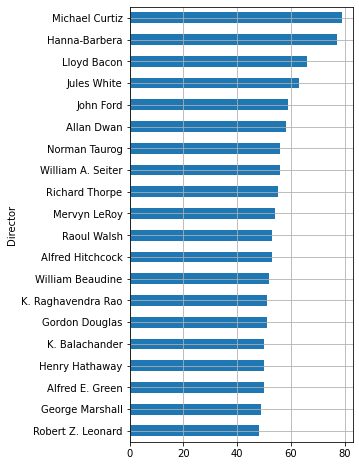

In [14]:
#Plotting the most popular movie directors in descending order
movie_plots_data[movie_plots_data['Director']!='Unknown'].groupby(['Director']).size().sort_values(ascending=True).tail(20).plot.barh(figsize=(4,8), grid=True)

Here, the distribution is not exponential. Michael Curtiz and Lloyd Bacon are very close in number with each having directed roughly 80 movies. Other popular directors such as Lloyd Bacon, Jules White and John Ford are close in proximity with each having directed around 60 movies.

##2.7 Visualize Top Titles

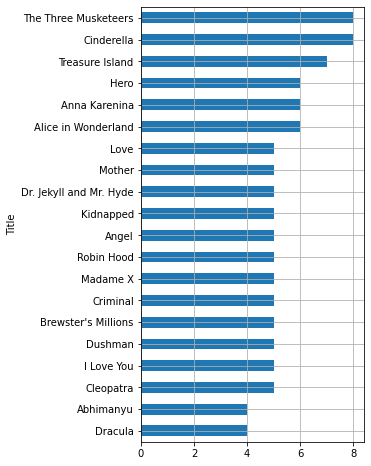

In [15]:
#Ploting the distribution of top movie titles
movie_plots_data[movie_plots_data['Title']!='Unknown'].groupby(['Title']).size().sort_values(ascending=True).tail(20).plot.barh(figsize=(4,8),grid=True)

Again, the distribution is not so exponential in nature. The count for popular movie titles does not rapidly decrease. The Three Musketeers and Cinderella are the most popular titles, followed closely by Treasure Island, Hero, Anna Karenina and Alice in Wonderland which have about 6 makes of the title.

##2.8 Visalize Top Casts

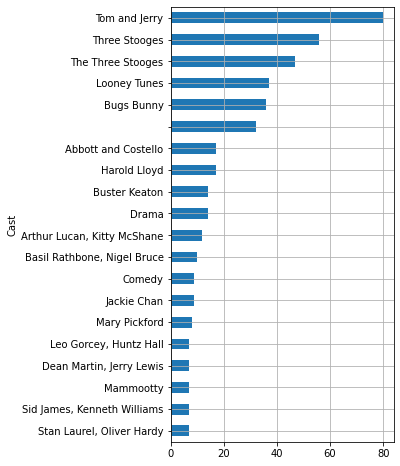

In [ ]:
#Plotting the top casts and seeing how they aare distributed throughout the dataset
movie_plots_data[movie_plots_data['Cast']!='Unknown'].groupby(['Cast']).size().sort_values(ascending=True).tail(20).plot.barh(figsize=(4,8),grid=True)

Tom and Jerry are the most popular characters, followed by the Three Stooges, Looney Toons and Bugs Bunny, in descending order and equlally spaced between each other. Interesting to note is the the fact that these are all cartoon characters. This is likely because there are lots of episodes in these series which are included in the plots dataset.

We've analyzed all the seven columns to see what knowledge we could extract and so far, the country of origin and the genre seem to be the most interesting  types which we could include for additional information.

#3.0 Basic Pre-Processing

##3.1 Selecting a subset of the data

This is important because the raw data is very large and we need to limit the data we are processing because of memeory and CPU constraints.

In [16]:
#Create a substet of the data by creating a filter based on the release year column
#Select values that are greater than or equal to 2005
movie_plots_data_selection = movie_plots_data[movie_plots_data['Release Year'] >= 2005]

In [17]:
#Previewing the data subset
movie_plots_data_selection.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
14591,2005,The 40-Year-Old Virgin,American,Judd Apatow,"Steve Carell, Catherine Keener, Paul Rudd",comedy,https://en.wikipedia.org/wiki/The_40-Year-Old_...,Andy Stitzer is a 40-year-old virgin who lives...
14592,2005,51 Birch Street,American,Doug Block,"love, marriage, fidelity and a suburban family",documentary,https://en.wikipedia.org/wiki/51_Birch_Street,51 Birch Street is the first-person account of...
14593,2005,The Adventures of Sharkboy and Lavagirl in 3-D,American,Robert Rodriguez,"Taylor Lautner, Taylor Dooley, Cayden Boyd, Ge...","family, superhero",https://en.wikipedia.org/wiki/The_Adventures_o...,Max is a lonely child in the suburbs of Austin...
14594,2005,Æon Flux,American,Karyn Kusama,Charlize Theron,science fiction,https://en.wikipedia.org/wiki/%C3%86on_Flux_(f...,"In 2011, a deadly pathogenic virus has killed ..."
14595,2005,The Amityville Horror,American,Andrew Douglas,"Ryan Reynolds, Melissa George, Jesse James, Ji...",horror,https://en.wikipedia.org/wiki/The_Amityville_H...,"In 1974, Ronald DeFeo Jr. murdered his family ..."


In [18]:
#The shape shows us the number of rows in the data subset we created
movie_plots_data_selection.shape

(10052, 8)

The new data subset is now roughly a third of the original data set.

#3. Topic Modelling

##3.1 Pre Processing for Topic Modelling
In this section, we use two common pre-processing methods Bag of Words (BoW) and Term Frequency - Inverse Document Frequency (TF-IDF) on the dataset. We will cover the LDA method and perform LDA computed with Bow and LDA computed with TF-IDF and see the difference between the two.

###Why is Topic Modeling important for creating knowledge graphs?
Knowledge graphs when used with topic modeling are an important part of knowledge mining. Knowledge graphs aim to find the links between entities, whereas topic modeling looks for ways to group text into clusteres.

Topic modeling's clustering approach is complimentary to Knowledge Graphs and provides a more compete view of a large dataset like the one we have (and many others as well). 

Combining the use of topic modeling with knowledge graphs also allows for improved graph searches by narrowing down graph search queries to more specific topics discovered during a technique called LDA.

###Bag of Words (BoW)
Bag of Words is used for classifying text documents by making use of the frequency of occurence of each token/word in a sentence. Grammar and word order are usually disregarded in Bow representation.

After transforming a text into a bag of words, we can calculate various measures to characterize the text.

The most common type of feature calculated from bag of words model is the *term frequency*. Term frequency is the number of times a token/word appears in a text.

###TF-IDF
In information retrieval, TF-IDF is a numercal statistic to compute how importatnt a token/word is to a text document or corpus of documents.


It is often used as a weighted factor in searches for information retrieval and text mining.

The TF-IDF value increases proportionately to the number of times a word/token appears in a text document and is offset by the number of documents in the corpus that contain the word which heps to adjust for the fact that some words appear more frequently in general.

###LDA
LDA is the abbreviation for Linear Discriminant Analysis. It is closely related to Principal Component Analysis of PCA, for short form. Both algorithmic techniques are used in factor analysis where we are looking for linear combinations of variables which best explain the data.

LDA explicity attemots to model the difference between classes if data it can find. It is a generalization of Fischer's Linear Discriminant, a method used in statistics, pattern recognition and machine learning to find a linear combnation of features that characterize or seperate two classes of objects or events. LDA is an unsupervised learning approach and therefore no manually labelled data is fed to the algorithm for training. *(Per the job description, I relaize that manual labelling of the data is required for the algorithm that Shopify uses).*

###Important Pre-Processing Standards

Before we perform any kind of processing on the data the text needs to be normalized. Normalization is done to put all words on equal footing and allows processing to proceed uniformly. We also perform stemming and lemmatization. 

*Stemming* is the process of eliminating any affixes from a word in order to arrive at the stem of a word. Stems are not necessarily actual words. For example, the word "arguing" has it's stem as "argu".

*Lemmatization* is the process of reducing a word to it's disctionary form. For example, the word "arguing" is lemmatized to "argue".

In [24]:
#importing necessary libraries
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(1234)
import nltk
nltk.download('wordnet')
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

Gensim is an NLP library

I use nltk lemmatizing and stemming methods

I also use the numpy library and set a fixed seed value to avoid random variations between consecutive runs of the code, as is good practice for reproducable experiment results.

##3.2 Select data subset: Films released in 2015 and after and of the Comedy genre

In [25]:
#Creating the dsubset 
movie_plots_selection = movie_plots_data[(movie_plots_data['Release Year'] >= 2015) & movie_plots_data['Genre'].str.contains('comedy')]

In [26]:
movie_plots = movie_plots_selection.Plot
movie_plots.head()

16917    Jimmy Callahan (Kevin Hart) provides best man ...
16922    Lord Charlie Mortdecai, an unscrupulous art de...
16925    Quinn (Simon Helberg) and Devon (Melanie Lynsk...
16934    Jerry (Ryan Reynolds) is an upbeat man who wor...
16935    The film opens with an unnamed dancer (Charles...
Name: Plot, dtype: object

##3.3 Topic Model Specific Pre-Processing

In [27]:
#instatiate a SnowballStemmer object for the english language
stemmer = SnowballStemmer('english')

def lemmatize_stemming(text):
    # lemmatize + stem a text
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        # normalization to remove stopword tokens and tokens of length small than 3
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2:
            # lemmatize + stem tokens
            result.append(lemmatize_stemming(token))
    return result

In [28]:
# preprocess movie plots
preprocessed_docs = movie_plots.map(preprocess)
preprocessed_docs.head()

16917    [jimmi, callahan, kevin, hart, provid, best, m...
16922    [lord, charli, mortdecai, unscrupul, art, deal...
16925    [quinn, simon, helberg, devon, melani, lynskey...
16934    [jerri, ryan, reynold, upbeat, man, work, bath...
16935    [film, open, unnam, dancer, charl, lil, buck, ...
Name: Plot, dtype: object

In [29]:
# example before preprocessing
print(movie_plots[movie_plots.index[0]][0:118])

Jimmy Callahan (Kevin Hart) provides best man services, through The Best Man Inc., for guys who don't have the friends


In [30]:
# example after preprocessing
preprocessed_docs[preprocessed_docs.index[0]][0:12]

['jimmi',
 'callahan',
 'kevin',
 'hart',
 'provid',
 'best',
 'man',
 'servic',
 'best',
 'man',
 'guy',
 'friend']

As you can see, after pre-processing, several tokens have been removed while those that have been preserved have been lemmatized and stemmed.

##3.4 Bag of Words (BoW)

Creating a Bow transformation of the dataset using gensim's dictionary and filter out extreme values: words that appear in lless than 10 douments and words that appear in 50% of the documents while keeping only the first 100,000 token sorted by their appearance frequency.

In [31]:
# BoW dictionary on the dataset
dictionary = gensim.corpora.Dictionary(preprocessed_docs)

In [32]:
# filter out extreme values
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=100000)

Thereafter, I recerate the corpus and do some exploratory data analysis on the most frequent words that appear in the data to get a better understanding of the terms. I do this by counting how many ties a token has apeared in the BoW corpus. I do this using a dictionary then convert it to a pandas data frame and sort values based on term counting and plot the top most frequent terms.

In [33]:
# create corpus using BoW transformation
bow_corpus = [dictionary.doc2bow(doc) for doc in preprocessed_docs]

In [34]:
# count word occurence
word_dict_count = {}
for doc in bow_corpus:
    for i, word_info in enumerate(doc):
        word = dictionary[word_info[0]]
        word_count = word_info[1]
        if word in word_dict_count:
            word_dict_count[word] += word_count
        else:
            word_dict_count[word] = 0

In [35]:
# create word dictionary
word_dict = {'words': list(word_dict_count.keys()), 'count': list(word_dict_count.values())}

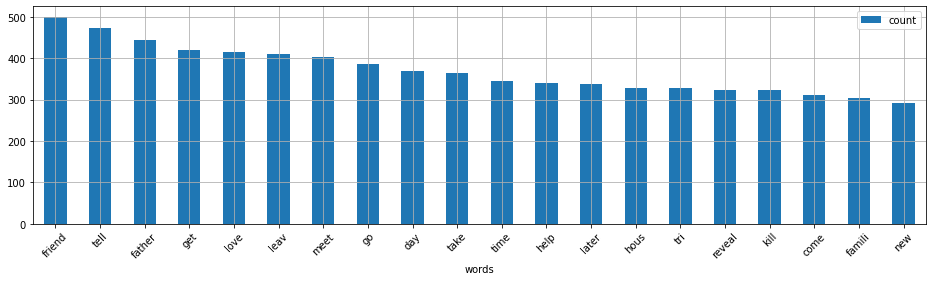

In [36]:
# create DataFrame
word_df = pd.DataFrame.from_dict(word_dict)
word_df.sort_values(by=['count'], ascending=False).head(20).plot(x='words', kind='bar', figsize=(16,4), rot=45, grid=True)

From the visualization we see that the 'get', 'tell', 'friend' and 'father' tokens are the most frequent words in the data. We expect that these terms will appear also in the topics we will compute with LDA.

##3.5 LDA using BoW

I'm training the LDA models and start by using the oW preprocessing. I want to extract 4 topis from the data and pass the BoW dictionary I computed earlier. It is used internally by the library for determining the vocabulary size as well as for the bagging and topic printing.

I create a methd to display the cmputed topics. By default, it includes 10 words, but I call this method to show 5.

In [37]:
# train LDA model using BoW
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=4, id2word=dictionary, passes=2, workers=4)

In [38]:
def show_model_topics(model, words_per_topic=10):
    for idx, topic in model.show_topics(num_words=words_per_topic, formatted=False):
        print('Topic {} | Words & Probability: {}'.format(idx, topic))

In [39]:
show_model_topics(lda_model, words_per_topic=5)

Topic 0 | Words & Probability: [('friend', 0.008890618), ('love', 0.008688431), ('school', 0.0071582654), ('leav', 0.0069917757), ('year', 0.006304975)]
Topic 1 | Words & Probability: [('tell', 0.008979466), ('get', 0.0077647837), ('leav', 0.007721027), ('meet', 0.0071938056), ('tri', 0.007025581)]
Topic 2 | Words & Probability: [('father', 0.012083194), ('friend', 0.011637828), ('love', 0.010389528), ('day', 0.00869085), ('meet', 0.0081614265)]
Topic 3 | Words & Probability: [('hous', 0.0087432815), ('kill', 0.008286529), ('friend', 0.0078064995), ('tell', 0.0067677265), ('ghost', 0.0066331676)]


The 4 topics the library has found are quite interesting.

The first includes the words 'friend', 'love' and 'school'.

The second includes the words 'tell', 'get' and 'leave'.

The third includes the words 'father', 'friend' and love and the fourth includes the words 'house', 'kill' and 'ghost'.

These are distinct words and probably refer to various plot categories. 

Also, as expected, sme of the most frequent words computed earlier are included in the topics the LDA algorithm has found.

##3.6 LDA using TF-IDF

Next, I'm training a new LDA model by addingg the TF-IDF transformation. 

The TF-IDF model is created using the BoW corpus and the same parameters are passed to the LDA library for training: 4 topics and the dictionary computed earlier.

In [40]:
from gensim import corpora, models

# create corpus
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [41]:
# train LDA model using TF-IDF
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=4, id2word=dictionary, passes=2, workers=4)

In [42]:
show_model_topics(lda_model_tfidf, words_per_topic=10)

Topic 0 | Words & Probability: [('jam', 0.003168589), ('movi', 0.0031658155), ('kill', 0.0029559515), ('meet', 0.0028721387), ('krishna', 0.0028223859), ('life', 0.002768274), ('ami', 0.0027428283), ('wife', 0.002638606), ('famili', 0.0026142653), ('year', 0.0025582165)]
Topic 1 | Words & Probability: [('love', 0.0036076058), ('man', 0.0035566539), ('film', 0.0035468433), ('girl', 0.0030150425), ('stori', 0.0029314687), ('dream', 0.002898039), ('comedi', 0.0028807628), ('ghost', 0.0027838785), ('friend', 0.0027818142), ('villag', 0.002657241)]
Topic 2 | Words & Probability: [('villag', 0.005387636), ('father', 0.0034078762), ('school', 0.0032746976), ('guy', 0.0028577445), ('kill', 0.0028362826), ('girl', 0.0027501064), ('polic', 0.0027405978), ('love', 0.0026644727), ('set', 0.0025067304), ('wed', 0.0024815637)]
Topic 3 | Words & Probability: [('ghost', 0.0039039906), ('team', 0.0036190827), ('father', 0.0034885122), ('hous', 0.0034882692), ('film', 0.0034289234), ('love', 0.003328839

The topics it has computed have completely different tokens that are more distinct compred to the initial BoW preprocessing.

Interesting to note that the token 'love' appears in 3 out of 4 topics. This is expected because TF-IDF leverages filtering capabilities to perofrm better pre-processing.

#4.0 Testing and Visualization

##4.1 Testing
We start off by selecting a sample sentence from the filtered dataset in use.

In [43]:
#Selectng the sentence at index 23 and transform it into BoW representation 
sample = movie_plots[movie_plots.index[23]]
txt = dictionary.doc2bow(preprocess(sample))

In [44]:
# Classify sample document using LDA BoW model
for index, score in sorted(lda_model[txt], reverse=True):
    print('\nScore: {}\t \nTopic: {}'.format(score, lda_model.print_topic(index, 10)))


Score: 0.34751492738723755	 
Topic: 0.009*"hous" + 0.008*"kill" + 0.008*"friend" + 0.007*"tell" + 0.007*"ghost" + 0.007*"decid" + 0.006*"get" + 0.006*"time" + 0.006*"stori" + 0.006*"famili"

Score: 0.059505898505449295	 
Topic: 0.012*"father" + 0.012*"friend" + 0.010*"love" + 0.009*"day" + 0.008*"meet" + 0.008*"tell" + 0.008*"go" + 0.007*"get" + 0.007*"famili" + 0.006*"reveal"

Score: 0.5619775056838989	 
Topic: 0.009*"tell" + 0.008*"get" + 0.008*"leav" + 0.007*"meet" + 0.007*"tri" + 0.007*"take" + 0.007*"help" + 0.007*"go" + 0.006*"return" + 0.006*"school"

Score: 0.031001629307866096	 
Topic: 0.009*"friend" + 0.009*"love" + 0.007*"school" + 0.007*"leav" + 0.006*"year" + 0.006*"return" + 0.006*"tell" + 0.006*"new" + 0.006*"home" + 0.006*"take"


The topic with the second largest weight has a score of 0.34 and has dominant tokens which include: 'house', 'kill', 'friend' and 'tell'.

The most dominant topic has a score value of 0.56 and it's dominant tokens include: 'tell', 'get', 'leave' and 'meet'.

The remaining two topics have very small weighted values and thererfore the text cannot be well described by these topics.

In [45]:
# Classify sample document using LDA TF-IDF model
for index, score in sorted(lda_model_tfidf[txt], reverse=True):
    print('\nScore: {}\t \nTopic: {}'.format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.8504155278205872	 
Topic: 0.005*"villag" + 0.003*"father" + 0.003*"school" + 0.003*"guy" + 0.003*"kill" + 0.003*"girl" + 0.003*"polic" + 0.003*"love" + 0.003*"set" + 0.002*"wed"

Score: 0.14546296000480652	 
Topic: 0.003*"jam" + 0.003*"movi" + 0.003*"kill" + 0.003*"meet" + 0.003*"krishna" + 0.003*"life" + 0.003*"ami" + 0.003*"wife" + 0.003*"famili" + 0.003*"year"


Here, there are only tw topics that are found to be relevant.

The first topic has a weighted score of 0.85. The most important tokens in this topic include: 'village','father', 'school' and guy. The topics discovered using this model differ from those discovered using the model that uses just the BoW.

The second topic has a weighted scre of 0.14 and produces more distinct topics than the BoW.

##4.1.1 Testing using Unseen Text

In [46]:
#define unseen text
unseen_document = 'The main character runs out of the house and tells his friend to get some help from someone in front of the school.'

In [47]:
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: tup[1], reverse=True):
    print('Score: {}\t Topic: {}'.format(score, lda_model.print_topic(index, 10)))

Score: 0.9094069004058838	 Topic: 0.009*"tell" + 0.008*"get" + 0.008*"leav" + 0.007*"meet" + 0.007*"tri" + 0.007*"take" + 0.007*"help" + 0.007*"go" + 0.006*"return" + 0.006*"school"
Score: 0.030331946909427643	 Topic: 0.009*"hous" + 0.008*"kill" + 0.008*"friend" + 0.007*"tell" + 0.007*"ghost" + 0.007*"decid" + 0.006*"get" + 0.006*"time" + 0.006*"stori" + 0.006*"famili"
Score: 0.030166059732437134	 Topic: 0.012*"father" + 0.012*"friend" + 0.010*"love" + 0.009*"day" + 0.008*"meet" + 0.008*"tell" + 0.008*"go" + 0.007*"get" + 0.007*"famili" + 0.006*"reveal"
Score: 0.030095169320702553	 Topic: 0.009*"friend" + 0.009*"love" + 0.007*"school" + 0.007*"leav" + 0.006*"year" + 0.006*"return" + 0.006*"tell" + 0.006*"new" + 0.006*"home" + 0.006*"take"


The dominant topic is clear has a score of 0.9 and has the main tokens as: 'tell', 'get', 'leave' and 'meet'. The other topics have very small scores, so the algorithm is very unambiguous in determining the topic the sentence falls in. 

In [48]:
# LDA TF-IDF
for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: tup[1], reverse=True):
    print("Score: {}\t Topic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))

Score: 0.9109057188034058	 Topic: 0.004*"ghost" + 0.004*"team" + 0.003*"father" + 0.003*"hous" + 0.003*"film" + 0.003*"love" + 0.003*"babi" + 0.003*"wed" + 0.003*"marri" + 0.003*"win"
Score: 0.029822563752532005	 Topic: 0.005*"villag" + 0.003*"father" + 0.003*"school" + 0.003*"guy" + 0.003*"kill" + 0.003*"girl" + 0.003*"polic" + 0.003*"love" + 0.003*"set" + 0.002*"wed"
Score: 0.029704175889492035	 Topic: 0.003*"jam" + 0.003*"movi" + 0.003*"kill" + 0.003*"meet" + 0.003*"krishna" + 0.003*"life" + 0.003*"ami" + 0.003*"wife" + 0.003*"famili" + 0.003*"year"
Score: 0.02956758625805378	 Topic: 0.004*"love" + 0.004*"man" + 0.004*"film" + 0.003*"girl" + 0.003*"stori" + 0.003*"dream" + 0.003*"comedi" + 0.003*"ghost" + 0.003*"friend" + 0.003*"villag"


In this model, the dominant topic has a score of 0.91 and the key tokens are: 'ghost', 'team', 'house' and 'father'. The dominant tokens seem to reflect better the theme of the sentence. The model in this case has even matched a atoken from the input sentence. The 'house' toke. The TF-IDF produces much clearer matching of the words to the topics.

##4.2 Visaulization

###4.2.1 LDA Model

###Understanding the Visualization
LDAvis creates interactive visualization.

When you generate visualizations you can see intertopic distances on the map via multi-dimensional scaling on the left. On the right hand side, the top most important terms for each selected topic.

The bars represent the terms that are most useful in interpreting the topic currently selected.

Two juxtaposed bars shoowcase the topic specific frequency of each token in red and the corpus wide frequency in blue-grey.

Relevance is denoted by lambda and represents the weight assigned to the probability of a tken in a topic relative to its lift. When lambda =1 , the terms are ranked by their probability within the topic - the regular method. When lambda = 0, the terms are ranked by their lift only. The value of lambda can be adjusted in the interface.

Lift is the. ratio of the term's probability within a topic to it's margin probability across the corpus. On one hand, it decreases the ranking of globally common tokens and on the other, it gives a high rankig to tokens that occur in a single topic.

In [51]:
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 7.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=c7e18085fac6aac9acd46d7e62658707b3d745bbb0b1bf9a74db041a09962477
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=06fc0c00bc1af46df378d484cddabddbcddce05757ff559500a0d2f518da5871
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


###LDA using BoW

In [52]:
lda_display = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In this LDA model, the bubbles are very clearly spaced from each other.

There is no overlap between any of them. This is most likely caused by the small amount of topics I trained tthe model on.

We can also see that topic 3 has more dominant terms than the others.

###LDA using TF-IDF

In [53]:
lda_tfidf_display = pyLDAvis.gensim_models.prepare(lda_model_tfidf, bow_corpus, dictionary, sort_topics=False)

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [54]:
pyLDAvis.display(lda_tfidf_display)

Again, in this model the bubbles are clearly spaced with no overlap.

Topic 3 has a dominant token 'village' while token 1 and 2 do not.